In [25]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import EarlyStopping

In [26]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [27]:
X_train.shape

(50000, 32, 32, 3)

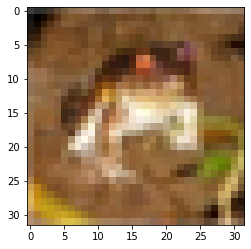

In [28]:
plt.imshow(X_train[0])

In [29]:
X_train = X_train/255
X_test = X_test/255

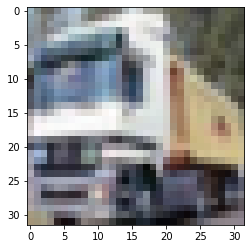

In [30]:
plt.imshow(X_train[1])

In [31]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [32]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=2)

model.fit(X_train,y_train_cat,epochs=10,validation_data=(X_test,y_test_cat),callbacks=[early_stop])

Epoch 1/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.5562 - accuracy: 0.4290 - val_loss: 1.3063 - val_accuracy: 0.5246
Epoch 2/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.2164 - accuracy: 0.5673 - val_loss: 1.1481 - val_accuracy: 0.5880
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0537 - accuracy: 0.6293 - val_loss: 1.0893 - val_accuracy: 0.6235
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9410 - accuracy: 0.6705 - val_loss: 1.0331 - val_accuracy: 0.6350
Epoch 5/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8499 - accuracy: 0.7042 - val_loss: 0.9975 - val_accuracy: 0.6531
Epoch 6/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.7707 - accuracy: 0.7291 - val_loss: 1.0195 - val_accuracy: 0.6641
Epoch 7/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7064 - accuracy: 0.7514 - val_loss: 0.9768 -

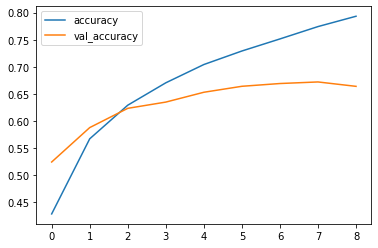

In [34]:
metrics = pd.DataFrame(model.history.history)

metrics[['accuracy','val_accuracy']].plot()

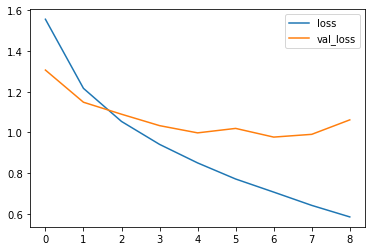

In [35]:
metrics[['loss','val_loss']].plot()

In [36]:
model.evaluate(X_test,y_test_cat)

313/313 [==============================] - 4s 12ms/step - loss: 1.0615 - accuracy: 0.6640


[1.0614794492721558, 0.6639999747276306]

In [37]:
from sklearn.metrics import classification_report

In [39]:
predictions = np.argmax(model.predict(X_test),axis=-1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.59      0.82      0.68      1000
           1       0.81      0.77      0.79      1000
           2       0.57      0.53      0.55      1000
           3       0.49      0.50      0.49      1000
           4       0.63      0.60      0.62      1000
           5       0.53      0.60      0.56      1000
           6       0.76      0.75      0.76      1000
           7       0.78      0.66      0.71      1000
           8       0.80      0.74      0.77      1000
           9       0.78      0.67      0.72      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.67     10000
weighted avg       0.67      0.66      0.67     10000

